# Feed-forward neural network

Feed-forward neural networks are reffered to as Multi-layer Perceptron. In this demo, we will train and test a multi-layer perceptron model on the MNIST handwritten digits dataset.

## 1. Load dataset

To load the original MNIST dataset, we can use the [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml) method. Since this method will need to download the dataset and load it into memory, it will take a while.

Note that an MNIST image has shape 28 x 28. Here the images have already been flatten to a vector of size 784.

In [ ]:
from sklearn.datasets import fetch_openml

X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.  # Scale the pixel values to be in [0, 1]

print(X.shape)
print(Y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


Show an example and its predicted label

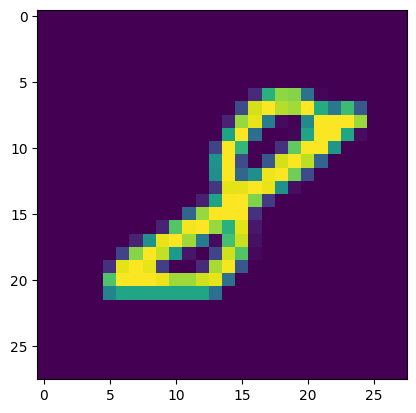

8


In [ ]:
import matplotlib.pyplot as plt

img_id = 1009
image = X[img_id].reshape((28, 28))
label = Y[img_id]

plt.imshow(image)
plt.show()
print(label)

## 2. Split dataset into train/test sets

Traditionally, we use 10,000 examples for the test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=10000)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## 3. Define and train an MLP classifier

We will define and train an MLP classifier with one hidden layer that contains 50 neurons and uses logistic activation. This classifier will be trained with SGD (Stochastic Gradient Descent) for 30 epochs. We also set 'verbose=True' to track the training progress.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,),
                    activation='logistic',
                    max_iter= 30,
                    verbose=True)

mlp.fit(X_train, Y_train)

Iteration 1, loss = 1.08331126
Iteration 2, loss = 0.41323492
Iteration 3, loss = 0.30969307
Iteration 4, loss = 0.26448780
Iteration 5, loss = 0.23560262
Iteration 6, loss = 0.21416409
Iteration 7, loss = 0.19678084
Iteration 8, loss = 0.18204338
Iteration 9, loss = 0.16963794
Iteration 10, loss = 0.15865041
Iteration 11, loss = 0.14883894
Iteration 12, loss = 0.14045801
Iteration 13, loss = 0.13286249
Iteration 14, loss = 0.12540418
Iteration 15, loss = 0.11929157
Iteration 16, loss = 0.11366457
Iteration 17, loss = 0.10803892
Iteration 18, loss = 0.10307994
Iteration 19, loss = 0.09849319
Iteration 20, loss = 0.09436732
Iteration 21, loss = 0.09013441
Iteration 22, loss = 0.08629508
Iteration 23, loss = 0.08277792
Iteration 24, loss = 0.07928602
Iteration 25, loss = 0.07647485
Iteration 26, loss = 0.07327734
Iteration 27, loss = 0.07038084
Iteration 28, loss = 0.06770680
Iteration 29, loss = 0.06507839
Iteration 30, loss = 0.06293824


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=30,
              verbose=True)

## 4. Evaluate the trained MLP on the test set

In [ ]:
from sklearn.metrics import accuracy_score


Y_pred = mlp.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)

print(acc)

0.9694


## 5. Show a test example and its predicted label

['4']


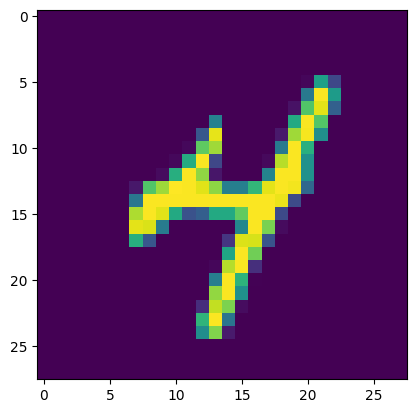

In [ ]:
import numpy as np

img_id = np.random.randint(1, 5000)

image = X_test[img_id]

plt.imshow(image.reshape((28, 28)))

prediction = mlp.predict(image.reshape((1, 784)))

print(prediction)